In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
import matplotlib

%matplotlib inline

In [2]:
print("scikit-learn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)

scikit-learn version: 1.6.1
pandas version: 2.2.3
numpy version: 2.2.4
matplotlib version: 3.10.1


In [3]:
df = pd.read_csv('data.csv')
len(df)

11914

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Since this dataset has columns which are suffering from inconsistencies (the column names sometimes have spaces, and sometimes have underscores, also capitalized or short strings with spaces on feature values), we may normalize them by replacing all spaces with underscores and lowercase all letters.

In [5]:
# Replacing space with underscores on column
df.columns = df.columns.str.lower().str.replace(' ', '_')
# List contaning columns with type object
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
# Replacing space with underscoes for string/object columns within list 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ','_')

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [6]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

### EDA

To begin EDA, keep in mind that we should always look at what the values of y look like, in this case the target is MSRP. Histogram is a common technique to figure out the distribution of the value respective to the frequency of how many value occurs.

In [7]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print("------------------")

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
------------------
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
------------------
year
[2011 2012 2013 1992 1993]
28
------------------
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
------------------
engine_hp
[335. 300. 230. 320. 172.]
356
------------------
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
------------------
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
------------------
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
------------------
number_of_doors
[ 2.  4.  3. nan]
3
------------------
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
------------------
vehicle_size
['compact' 'midsize' 'large']
3
------------------
vehicle_style


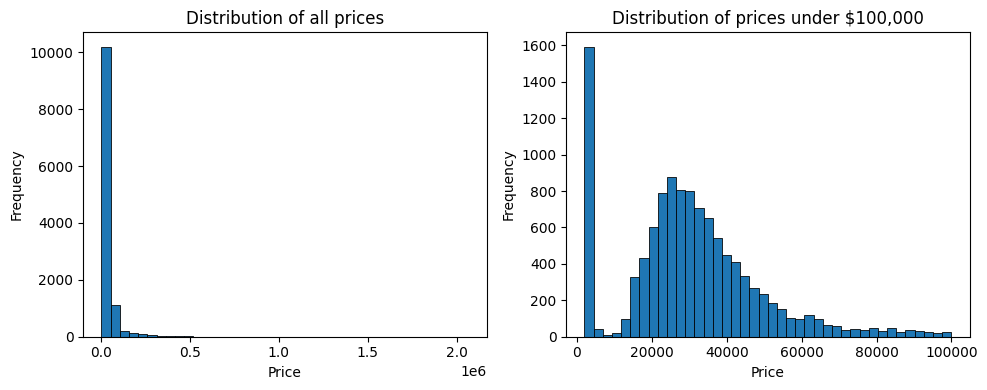

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(df.msrp, bins=40, alpha=1, ax=axs[0])
axs[0].set_ylabel('Frequency')
axs[0].set_xlabel('Price')
axs[0].set_title('Distribution of all prices')

sns.histplot(df.msrp[df.msrp < 100000], bins=40, alpha=1, ax=axs[1])
axs[1].set_ylabel('Frequency')
axs[1].set_xlabel('Price')
axs[1].set_title('Distribution of prices under $100,000')

plt.tight_layout()
plt.show()

In [11]:
print(f"log1p (+1): {np.log1p([0,1,10,100,1000])}")
print(f"log : {np.log([0+1,1+1,10+1,100+1,1000+1])}")

log1p (+1): [0.         0.69314718 2.39789527 4.61512052 6.90875478]
log : [0.         0.69314718 2.39789527 4.61512052 6.90875478]


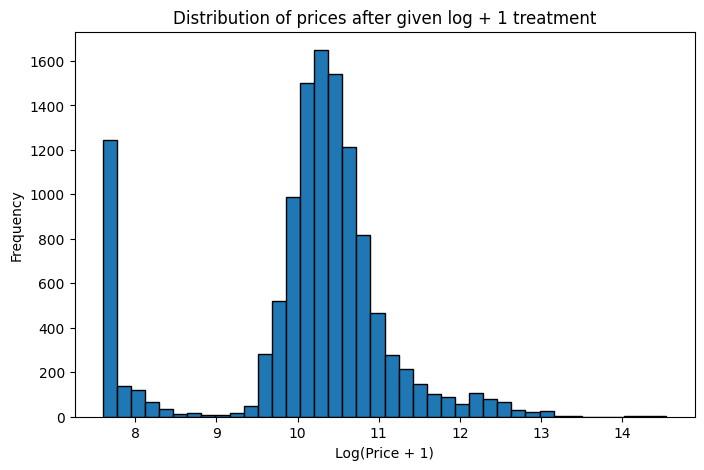

In [12]:
## The logarithm of zero is minus infinity, but the logarithm of one is zero. 
## If our values are all non-negative, by adding 1, we make sure that the transformed values do not go below zero.
log_price = np.log1p(df.msrp)
plt.figure(figsize=(8, 5))
sns.histplot(log_price, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after given log + 1 treatment')

plt.show()

In [13]:
### Choose columns with types of numerical characters
df.select_dtypes(include=['float64','int64']).columns

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [15]:
## Checking missing values on each column
df.columns[df.isnull().any()]

Index(['engine_fuel_type', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'market_category'],
      dtype='object')

### Validation Framework

In [16]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
## Take two portions out to make val and test compartments first
## So that the remaining part goes to training set
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

## Shuffle dataset respective to shuffled index
df_shuffled = df.iloc[idx]

# Laying out three sets
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [17]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

### Linear Regression

Take a data example before going through a simple demonstration with regression.

In [18]:
df.iloc[9]

make                                         bmw
model                                   1_series
year                                        2013
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  230.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category                           luxury
vehicle_size                             compact
vehicle_style                        convertible
highway_mpg                                   27
city_mpg                                      18
popularity                                  3916
msrp                                       37200
Name: 9, dtype: object

Pick a few numerical features and ignore the rest for now. We can start with horsepower, MPG in the city, and popularity.

```
engine_hp         230
city_mpg           18
popularity         3916
```

Assign feature vector xi with three components, then apply function g to this vector to produce `y_pred` as an output.
Formula of function g is as follows:

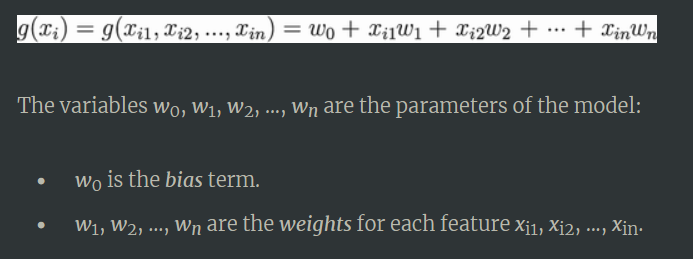

In [19]:
xi_example = [7.43, 18, 39.2]

w0 = 3.76
w = [0.12, 0.06, 0.15]

In [20]:
def linear_regression(xi):
    """
    Translate function linear regression to python. 
    Loop over weights and multiply them by the corresponding feature values
    """
    n = len(xi)
    result = w0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

In [21]:
linear_regression(xi_example)

11.6116

Remember, during preprocessing, we applied the `logarithmic transformation (y+1)` to our target variable y. So the model we trained on this data also predicts the logarithm of the price.

In [25]:
print(f"Price that is converted from logarithmic prediction is {np.exp(linear_regression(xi_example))}")

Price that is converted from logarithmic prediction is 110370.70231226837


In [23]:
### Conversion using numpy expm1
np.expm1(linear_regression(xi_example))

np.float64(110369.70231226837)

In [24]:
### Reverting back to the log form
np.log1p(110369.70231226837)

np.float64(11.6116)

### Linear Regression Vector Form

In [26]:
def dot(xi, w):
    n = len(w)
    result = 0.0
    for j in range(n):
        result = result + xi[j] * w[j]
    return result

def linear_regression(xi):
    return w0 + dot(xi, w)

Because now w becomes a (n+1)-dimensional vector, we also need to adjust the feature vector xi so that the dot product between them still works. We can do this easily by adding a dummy feature xi_0, which always takes the value 1.

In [27]:
w_new = [w0] + w
w_new

[3.76, 0.12, 0.06, 0.15]

In [28]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

linear_regression(xi_example)

11.6116

In [29]:
df.iloc[9:13][['engine_hp','city_mpg','popularity']]

,engine_hp,city_mpg,popularity
9,230.0,18,3916
10,300.0,20,3916
11,230.0,19,3916
12,300.0,19,3916


In [30]:
x1 = [1, 230, 18, 3916]
x2 = [1, 300, 20, 3916]
x3 = [1, 230, 19, 3916]
x4 = [1, 300, 19, 3916]
x5 = [1, 7.43, 18, 39.2]

X_example = [x1, x2, x3, x4, x5]
X_example = np.array(X_example)
X_example

array([[1.000e+00, 2.300e+02, 1.800e+01, 3.916e+03],
       [1.000e+00, 3.000e+02, 2.000e+01, 3.916e+03],
       [1.000e+00, 2.300e+02, 1.900e+01, 3.916e+03],
       [1.000e+00, 3.000e+02, 1.900e+01, 3.916e+03],
       [1.000e+00, 7.430e+00, 1.800e+01, 3.920e+01]])

In [31]:
w_new = [w0] + w
w_new

[3.76, 0.12, 0.06, 0.15]

In [32]:
X_example.dot(w_new)

array([619.84  , 628.36  , 619.9   , 628.3   ,  11.6116])

### Training a Linear Regression Model

In [33]:
def train_linear_regression(X, y):
    """
    Train linear regression given feature input X and target y 
    to create model parameters (weights) for features 
    """
    # add the dummy column every time we want to make predictions
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    # normal equation formula
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

### Baseline solution

In [34]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [35]:
## Prepare input feature using function prepare_X
X_train = prepare_X(df_train)

## Train linear regression model
w_0, w = train_linear_regression(X_train, y_train)

In [37]:
print(w_0)
print(w)

7.927257388069986
[ 9.70589522e-03 -1.59103494e-01  1.43792133e-02  1.49441072e-02
 -9.06908672e-06]


In [36]:
y_pred = w_0 + X_train.dot(w)

We see that our predictions aren’t very good; they are very different from the actual distribution.

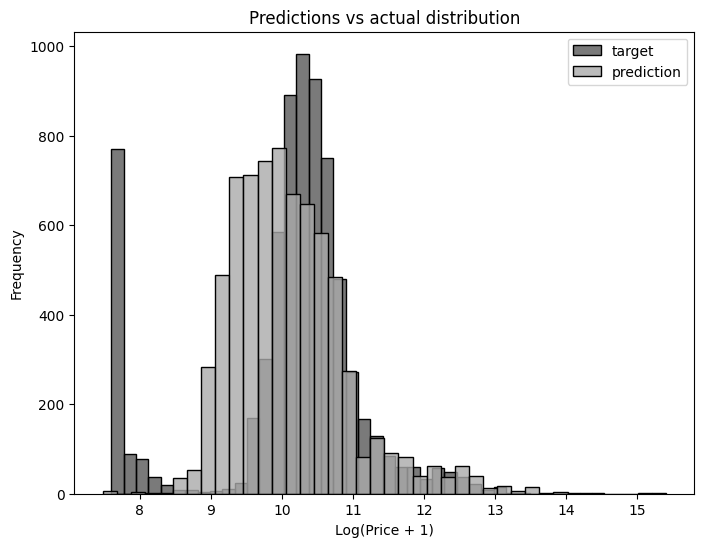

In [38]:
plt.figure(figsize=(8, 6))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

Metric suitable for quantification on the quality of the model is RMSE; this tells difference between the prediction we make for the observation and the actual target value for that observation.

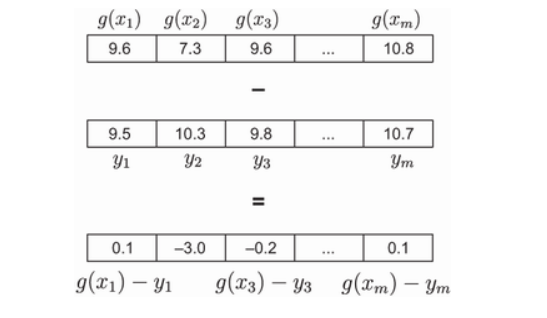

For each difference between predicted value and actual, a greater difference means a greater square it has. 
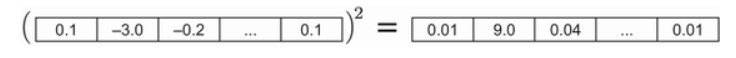

Putting all the squared errors together with summation over all m observations, then dividing the sum with m, and lastly take the square root of mean squared error: 
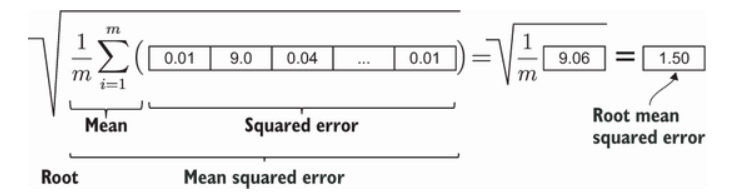

Better alternative we look for is applying the same operation to all elements of NumPy arrays (vectorization).

In [39]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [40]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

### Model Validation

Do the same for features in validation set: applying function `prepare_X` on `df_val`. Then apply the model to get the prediction and compare them with `y_val`.

In [41]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [42]:
rmse(y_val, y_pred)

np.float64(0.761653099130156)

So far, tasks done to fit linear regression on training and validation set include preprocessing, matrix multiplication to yield weight parameters to be paired with features and using weights to calculate prediction and compare them with actual values. Some logical steps are contained within functions. 

### Simple feature engineering

Feature engineering allows us to improve our model further, adding more features to the model: we create others and add them to the existing features. Our aim is to improve the RMSE calculated on the validation data.

In [43]:
## Updating function
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    # calculate the age by subtracting the year when the car was made from 2017
    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Let's see if updating `prepare_X` will improve prediction capability reflected from RMSE. 

In [44]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5175055465840046
validation 0.5172055461058299


Finding in visual also confirm this: the distribution of the predictions follows the target distribution a lot more closely than previously. Indeed, the validation RMSE score confirms it.

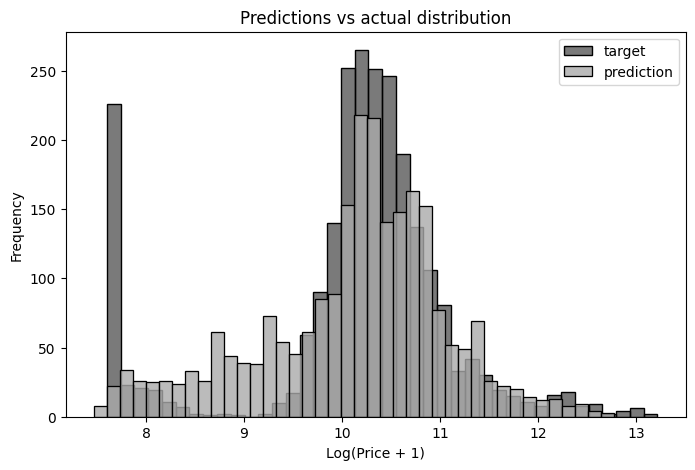

In [45]:
plt.figure(figsize=(8, 5))

sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Handling categorical variables

One of the simplest ways for making use of categorical variables is to encode such variables by a set of binary features, with a separate feature for each distinct value.

In [46]:
## Update prepare_X
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    # calculate the age by subtracting the year when the car was made from 2017
    df['age'] = 2017 - df.year
    features.append('age')
    # encode variables by a set of binary features
    # create three binary features based on doors that car has
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    # create five variables based on car brand
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [47]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

print('validation:', rmse(y_val, y_pred))

validation: 0.5076038849556795


Again, the score on validation set improves by around 0.01.

Let's try implementing encoding techniques to other categorical features.

In [48]:
## Update prepare_X
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    df['age'] = 2017 - df.year
    features.append('age')
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    for v in ['regular_unleaded', 'premium_unleaded_(required)',
              'premium_unleaded_(recommended)',
              'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
    for v in ['front_wheel_drive', 'rear_wheel_drive',
              'all_wheel_drive', 'four_wheel_drive']:
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
    for v in ['crossover', 'flex_fuel', 'luxury',
              'luxury,performance', 'hatchback']:
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
    for v in ['compact', 'midsize', 'large']:
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible',
              '4dr_hatchback']:
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [49]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 71.37786410717939


This time, instead of helping, adding new features with encoding made the score a lot worse. Luckily, we have validation to help us spot this problem. 

### Regularization

Numerical instability is the root cause behind an increasing error after adding features to the model. Inverse of the matrix XTX from the normal equation may accidentaly add a column resulted from other column combinations. Not only the matrix XTX renders undetermined or singular, the invert of this resultant matrix is not raised when running the code. Try to invert a singular matrix, NumPy will tell us about that by raising a `LinAlgError: Singular matrix`.

Some of the values in the weights become extremely large. This is the case when bias term has the value of extremely large value while other weight components have extremely negative values as well.

That is where regularization emerges to give better control of weight update so as to correct behaviours.

One way to do regularization is to add a small number to each diagonal element of the matrix. The modified formula is as follows:

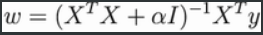

More specifically, we attempt to invert the matrix through addition on diagonal elements of XTX with identity matrix multiplied with alpha.

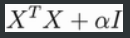

In [50]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    
    # Introducing regularization. np.eye create an identity matrix
    reg = r * np.eye(XTX.shape[0])
    
    # Adding regularized identity matrix to diagonal element of matrix XTX
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

In [51]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[21]))

    0, 15838998853873358.00, -11.14, -15838998853873556.00
0.001, 7.20, -0.10, 1.81
 0.01, 7.18, -0.10, 1.81
  0.1, 7.05, -0.10, 1.78
    1, 6.22, -0.10, 1.56
   10, 4.39, -0.09, 1.08


In [52]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.46022676273364194


Achieved improvement over the previous score (0.507)

A point to remember: Adding new features to the model does not always come out successful in improving prediction. Use validation dataset to confirm whether feature engineering or regularizing model or both are useful.

In [53]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

### Trying various numbers of regularization factor to see the difference in RMSE on validation set
for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-06 0.4602254842478849
0.0001 0.4602254932133925
 0.001 0.46022676273364194
  0.01 0.46023949636591693
   0.1 0.4603700695794901
     1 0.46182980426474285
     5 0.46840796275311086
    10 0.4757248100694009


Performance analysis show nearly no improvement occurs when applying smaller factor on the model. Just keep going on then. Take the model with r=0.01 to check against the test set for verification whether the model does well.

In [54]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.46023949636591693
test: 0.4571813679733763


We see that RMSE on both validation and test sets are closely even, thus coming to conclude that the model can generalize well to the new unseen data.

### Using the Model

As we now have a model, we can start using it for predicting the price of a car.

In [55]:
ad = {
    'city_mpg': 18,
    'driven_wheels': 'all_wheel_drive',
    'engine_cylinders': 6.0,
    'engine_fuel_type': 'regular_unleaded',
    'engine_hp': 268.0,
    'highway_mpg': 25,
    'make': 'toyota',
    'market_category': 'crossover,performance',
    'model': 'venza',
    'number_of_doors': 4.0,
    'popularity': 2031,
    'transmission_type': 'automatic',
    'vehicle_size': 'midsize',
    'vehicle_style': 'wagon',
    'year': 2013
}

In [56]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)

y_pred = w_0 + X_test.dot(w)

Remember that prediction output from matrix multiplication bears logarithmic format, thus needing for revert to real price with exponential function.

In [57]:
suggestion = np.expm1(y_pred)
suggestion

array([28294.13592896])

The output is 28,294.13. The real price of this car is $31,120, so our model is not far from the actual price.